##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Entity extraction

Use Gemini API to speed up some of your tasks, such as searching through text to extract needed information. Entity extraction with a Gemini model is a simple query, and you can ask it to retrieve its answer in the form that you prefer.

This notebook shows how to extract entities into a list.

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Entity_Extraction.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

## Setup

In [5]:
%pip install -U -q "google-genai>=1.0.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.7/159.7 kB 8.2 MB/s eta 0:00:00


## Configure your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) for an example.

In [6]:
from google import genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)

# Select the model

Additionally, select the model you want to use from the available options below:

In [10]:
MODEL_ID = "gemini-2.0-flash-lite"  # @param ["gemini-2.0-flash-lite", "gemini-2.0-flash", "gemini-2.5-flash-preview-04-17","gemini-2.5-pro-exp-03-25"] {"allow-input": true, "isTemplate": true}

In [29]:
import os
import csv

def list_filenames_to_csv(folder_path, output_file_path):
  """
  Creates a CSV file containing a list of filenames from a specified folder.

  Args:
    folder_path: The path to the folder containing the files.
    output_file_path: The path to the output CSV file.
  """
  filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

  with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['file_name'])  # Write header
    for filename in filenames:
      writer.writerow([filename])

# Set paths
folder_path = '/content/drive/MyDrive/subtitles/Season 5'
output_file_path = '/content/drive/MyDrive/subtitles/Season 5-names.csv'

# Create the CSV file
list_filenames_to_csv(folder_path, output_file_path)

print(f"List of filenames saved to: {output_file_path}")

List of filenames saved to: /content/drive/MyDrive/subtitles/Season 5-names.csv


In [30]:
import os
import re
import csv

def analyze_and_rename_files(folder_path):
  """
  Analyzes filenames, extracts YouTube ID and date, stores them in a CSV, and renames files.

  Args:
    folder_path: The path to the folder containing the files.
  """
  file_data = []
  for filename in os.listdir(folder_path):
    if filename.endswith('.srt'):
      try:
        # Extract YouTube ID and date using regular expressions
        match = re.match(r'([a-zA-Z0-9_-]{11})¦¦¦(.*)¦¦¦(.*)¦¦¦(.*)¦¦¦([0-9]{4}⁄[0-9]{2}⁄[0-9]{2})\.srt', filename)
        if match:
          youtube_id, title_part1, title_part2, duration, date_published = match.groups()
          file_data.append([youtube_id, title_part1 + '¦¦¦' + title_part2 + '¦¦¦' + duration + '¦¦¦', date_published, filename])

          # Rename the file
          new_filename = title_part1 + '¦¦¦' + title_part2 + '¦¦¦' + duration + '¦¦¦' + '.srt'
          os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
          print(f"Renamed: {filename} to {new_filename}")

      except Exception as e:
        print(f"Error processing filename: {filename} - {e}")

  # Store the data in a CSV file
  with open(os.path.join(folder_path, 'files.csv'), 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['youtube_id', 'title_chapter', 'date_published', 'original_filename'])  # Write header
    writer.writerows(file_data)  # Write the data rows

  print(f"File data saved to: {os.path.join(folder_path, 'files.csv')}")

# Set the folder path
folder_path = '/content/drive/MyDrive/subtitles/Season 5'

# Analyze and rename files
analyze_and_rename_files(folder_path)

Renamed: AWPR1Ql54N8¦¦¦La Base 5x49 ¦ Putin dispara un misil balístico hipersónico. ¿Qué será lo próximo¿ (Spanish_ASR)¦¦¦¦¦¦3501s¦¦¦2024⁄11⁄25.srt to La Base 5x49 ¦ Putin dispara un misil balístico hipersónico. ¿Qué será lo próximo¿ (Spanish_ASR)¦¦¦¦¦¦3501s¦¦¦.srt
Renamed: C6NxhmzlLAI¦¦¦La Base 5x109 ¦ Netanyahu vuelve a bombardear Gaza y m#t# a 170 niños (Spanish_ASR)¦¦¦¦¦¦3013s¦¦¦2025⁄03⁄19.srt to La Base 5x109 ¦ Netanyahu vuelve a bombardear Gaza y m#t# a 170 niños (Spanish_ASR)¦¦¦¦¦¦3013s¦¦¦.srt
Renamed: BOPPepStFrk¦¦¦La Base 5x121 ¦ China planta cara a Trump en la guerra comercial (Spanish_ASR)¦¦¦¦¦¦2900s¦¦¦2025⁄04⁄09.srt to La Base 5x121 ¦ China planta cara a Trump en la guerra comercial (Spanish_ASR)¦¦¦¦¦¦2900s¦¦¦.srt
Renamed: ARJNMDeZ_6s¦¦¦La Base 5x87 ¦ Noboa y González empatan + ENTREVISTA EXCLUSIVA a Luisa González (Spanish_ASR)¦¦¦¦¦¦3179s¦¦¦2025⁄02⁄10.srt to La Base 5x87 ¦ Noboa y González empatan + ENTREVISTA EXCLUSIVA a Luisa González (Spanish_ASR)¦¦¦¦¦¦3

In [31]:
import os
import re

def analyze_and_rename_files(folder_path):
  """
  Analyzes filenames, extracts and removes duration and separators, and renames files.

  Args:
    folder_path: The path to the folder containing the files.
  """
  for filename in os.listdir(folder_path):
    if filename.endswith('.srt'):
      try:
        # Extract duration using regular expressions
        match = re.search(r'(¦¦¦¦¦¦)([0-9]+s)(¦¦¦)', filename)
        if match:
          separator1, duration, separator2 = match.groups()

          # Remove duration and separators from filename
          new_filename = filename.replace(separator1, '').replace(duration, '').replace(separator2, '')
          new_filename = new_filename.replace("(Spanish_ASR)","").replace("¦¦¦¦¦¦", "") # Assuming (Spanish_ASR) is always present

          # Rename the file
          os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
          print(f"Renamed: {filename} to {new_filename}")

      except Exception as e:
        print(f"Error processing filename: {filename} - {e}")

# Set the folder path
folder_path = '/content/drive/MyDrive/subtitles/Season 5'

# Analyze and rename files
analyze_and_rename_files(folder_path)

Renamed: La Base 5x49 ¦ Putin dispara un misil balístico hipersónico. ¿Qué será lo próximo¿ (Spanish_ASR)¦¦¦¦¦¦3501s¦¦¦.srt to La Base 5x49 ¦ Putin dispara un misil balístico hipersónico. ¿Qué será lo próximo¿ .srt
Renamed: La Base 5x109 ¦ Netanyahu vuelve a bombardear Gaza y m#t# a 170 niños (Spanish_ASR)¦¦¦¦¦¦3013s¦¦¦.srt to La Base 5x109 ¦ Netanyahu vuelve a bombardear Gaza y m#t# a 170 niños .srt
Renamed: La Base 5x121 ¦ China planta cara a Trump en la guerra comercial (Spanish_ASR)¦¦¦¦¦¦2900s¦¦¦.srt to La Base 5x121 ¦ China planta cara a Trump en la guerra comercial .srt
Renamed: La Base 5x87 ¦ Noboa y González empatan + ENTREVISTA EXCLUSIVA a Luisa González (Spanish_ASR)¦¦¦¦¦¦3179s¦¦¦.srt to La Base 5x87 ¦ Noboa y González empatan + ENTREVISTA EXCLUSIVA a Luisa González .srt
Renamed: La Base 5x88 ¦ ¿Hará algo la UE ante los aranceles de Trump¿ (Spanish_ASR)¦¦¦¦¦¦3076s¦¦¦.srt to La Base 5x88 ¦ ¿Hará algo la UE ante los aranceles de Trump¿ .srt
Renamed: La Base 5x

In [32]:
import os
import re

def analyze_and_rename_files(folder_path):
  """
  Analyzes filenames, extracts and removes duration, separators, and the space before .srt.
  """
  for filename in os.listdir(folder_path):
    if filename.endswith('.srt'):
      try:
        # Remove the space before .srt
        if filename.endswith(" .srt"):  # Check for space before .srt
            new_filename = filename.replace(" .srt", ".srt")
            os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
            print(f"Renamed: {filename} to {new_filename}")

        # ... (Rest of the code to remove duration, separators, and (Spanish_ASR) remains the same) ...

      except Exception as e:
        print(f"Error processing filename: {filename} - {e}")

# Set the folder path
folder_path = '/content/drive/MyDrive/subtitles/Season 5'

# Analyze and rename files
analyze_and_rename_files(folder_path)

Renamed: La Base 5x49 ¦ Putin dispara un misil balístico hipersónico. ¿Qué será lo próximo¿ .srt to La Base 5x49 ¦ Putin dispara un misil balístico hipersónico. ¿Qué será lo próximo¿.srt
Renamed: La Base 5x109 ¦ Netanyahu vuelve a bombardear Gaza y m#t# a 170 niños .srt to La Base 5x109 ¦ Netanyahu vuelve a bombardear Gaza y m#t# a 170 niños.srt
Renamed: La Base 5x121 ¦ China planta cara a Trump en la guerra comercial .srt to La Base 5x121 ¦ China planta cara a Trump en la guerra comercial.srt
Renamed: La Base 5x87 ¦ Noboa y González empatan + ENTREVISTA EXCLUSIVA a Luisa González .srt to La Base 5x87 ¦ Noboa y González empatan + ENTREVISTA EXCLUSIVA a Luisa González.srt
Renamed: La Base 5x88 ¦ ¿Hará algo la UE ante los aranceles de Trump¿ .srt to La Base 5x88 ¦ ¿Hará algo la UE ante los aranceles de Trump¿.srt
Renamed: La Base 5x55 ¦ Fracasa el golpe militar del presidente surcoreano Yoon Suk Yeol .srt to La Base 5x55 ¦ Fracasa el golpe militar del presidente surcore

In [33]:
import shutil
import os

# Source and destination folders
source_folders = [f'/content/drive/MyDrive/subtitles/Season {i}' for i in range(1, 6)]  # Season 1 to Season 5
destination_folder = '/content/drive/MyDrive/subtitles/All La Base'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy the files
for source_folder in source_folders:
    for filename in os.listdir(source_folder):
        if filename.endswith('.srt'):
            source_path = os.path.join(source_folder, filename)
            destination_path = os.path.join(destination_folder, filename)
            shutil.copy(source_path, destination_path)
            print(f"Copied: {filename} to {destination_folder}")

print("Copying complete.")

Copied: La Base #1 - El poder mediático (Spanish_ASR).srt to /content/drive/MyDrive/subtitles/All La Base
Copied: La Base #75 - La izquierda transforma pero pierde el relato (Spanish_ASR).srt to /content/drive/MyDrive/subtitles/All La Base
Copied: La Base #77 - La derecha gana en Andalucía (Spanish_ASR).srt to /content/drive/MyDrive/subtitles/All La Base
Copied: La Base #8 - Tax the rich (Spanish_ASR).srt to /content/drive/MyDrive/subtitles/All La Base
Copied: La Base #79 - Antonio Caño, director de El País (Spanish_ASR).srt to /content/drive/MyDrive/subtitles/All La Base
Copied: La Base #76 - Chomsky en La Base_ la guerra de Ucrania y los medios (Spanish_ASR).srt to /content/drive/MyDrive/subtitles/All La Base
Copied: La Base #81 - Crimen en Melilla_ _asunto bien resuelto_ (Spanish_ASR).srt to /content/drive/MyDrive/subtitles/All La Base
Copied: La Base #74 - Almudena Grandes y la guerra interminable (Spanish_ASR).srt to /content/drive/MyDrive/subtitles/All La Base
Copied: La Base

In [1]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib gspread

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [22]:
sh = gc.open_by_key('1dYMnP5IhTAsOqX-lZyOSIsn1U2FZO1yYOb6LHWhcY3c') # replace with your spreadsheet key
worksheet = sh.worksheet('Sheet3') #replace with your sheet name

In [25]:
cell_value = worksheet.acell('H15').value # extract cell H3 for the header
print(cell_value)

[Aplausos] [Música] [Aplausos] en las últimas dos semanas Se ha producido un aumento de la acción principalmente a través de campamentos de solidaridad en los campus entre la diáspora Palestina y sus comunidades de apoyo en el extranjero inspiradas por el ejemplo que los estudiantes de la Universidad de Columbia dieron con su campamento de solidaridad con gaza las organizaciones universitarias de todo el mundo se están sumando en menos de dos semanas hemos visto como los campamentos de solidaridad se han extendido rápidamente por todo Estados Unidos y otros países aliados con la entidad sionista los campamentos de solidaridad con gaza deben socavar su separación mediante el empleo de estrategias exitosas para su lucha a saber la unidad de los campus con el fin de escalar de simples demandas de desinversión a una realidad verdaderamente anticolonial que puede imponerse a las instituciones occidentales los campamentos de solidaridad se han formado a partir de la conciencia de personas ju

# Examples

### Extracting few entities at once

This block of text is about possible ways to travel from the airport to the Colosseum.  

Let's extract all street names and proposed forms of transportation from it.

In [10]:
direcciones = """

"""

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You will use Gemini 2.0 Flash model for fast responses.

In [ ]:
from IPython.display import Markdown

directions_prompt = f"""
  Del texto dado, extraiga las siguientes entidades y devuelva una lista de cuantas veces aparece cada una.
Escribe todas las variantes posibles de las entidades.
Agrega el contexto en el que aparece cada una con un máximo de 400 caracteres.
Analiza y indica si la entidad fue descrita en un texto positivo o negativo.
Entidades a extraer: ucrania, rusia, niño, matar, israel, putin, zelenski, genocidio.
Texto: {cell_value}
ucrania = []
rusia = []
niño = []
matar = []
putin = []
zelenski  = []
genocidio = []
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=directions_prompt
)

Markdown(response.text)

In [32]:
from IPython.display import Markdown

directions_prompt = f"""
  Del texto dado, extraiga las siguientes entidades y devuelva una lista de cuantas veces aparece cada una.
Escribe todas las variantes posibles de las entidades.
Agrega el contexto con un máximo de 400 caracteres, en el que aparece cada una.
Analiza y indica si la entidad fue descrita en un texto positivo o negativo.
Entidades a extraer: ucrania, rusia, niño, matar, israel, putin, zelenski, genocidio.
Texto: {cell_value}
ucrania = []
rusia = []
niño = []
matar = []
putin = []
zelenski  = []
genocidio = []
"""

# ... (previous code for authentication and prompt setup) ...

response = client.models.generate_content(
    model=MODEL_ID,
    contents=directions_prompt
)

# Get the "results" sheet
results_worksheet = sh.worksheet('results')  # Replace 'results' with your desired sheet name

# Write the response to the sheet
results_worksheet.update_acell('A1', response.text)  # Update cell A1 with the response

print("Response saved to 'results' sheet in the Google Sheet.")

Response saved to 'results' sheet in the Google Sheet.


In [33]:
from IPython.display import Markdown

directions_prompt = f"""
  Del texto dado, extraiga las siguientes entidades y devuelva una lista de cuantas veces aparece cada una.
Busca qué medios de comunicación se mencionan en el texto.
Escribe todas las variantes posibles de las entidades.
Agrega el contexto con un máximo de 300 caracteres, en el que aparece cada una.
Analiza y indica si la entidad fue descrita en el texto de forma negativa o positiva. Evalua el contexto y puntualo en una escala de 1 a 10 donde 10 es una respuesta perfecta.
Analiza si el medio de comunicación fue criticado o fue citado en forma neurtal o positiva.
Texto: {cell_value}
Entidades a extraer: serán los nombres de los medios de comunicación extraidos.
"""

# ... (previous code for authentication and prompt setup) ...

response = client.models.generate_content(
    model=MODEL_ID,
    contents=directions_prompt
)

# Get the "results" sheet
results_worksheet = sh.worksheet('results')  # Replace 'results' with your desired sheet name

# Write the response to the sheet
results_worksheet.update_acell('A1', response.text)  # Update cell A1 with the response

print("Response saved to 'results' sheet in the Google Sheet.")

Response saved to 'results' sheet in the Google Sheet.


In [12]:
from google import genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY) # initializing the client object

import pandas as pd
from google.colab import auth
import gspread
from google.auth import default
from IPython.display import Markdown

# Authenticate with Google and access the spreadsheet
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
sh = gc.open_by_key('18R42d8LLQCCXuqIWeOyRJvEEV8hou6Cr0JPApNalOcw') # Replace with your spreadsheet ID
results_worksheet = sh.worksheet('medios')  # Select the 'medios' sheet

# Load the text from the CSV file
df = pd.read_csv('/content/drive/MyDrive/subtitles/subtitles-text-all.csv')
text_to_analyze = " ".join(df['text_transcription'].astype(str).tolist())  # Combine all transcripts

# Define the prompt for the Gemini model
directions_prompt = f"""
Del texto dado, extraiga las siguientes entidades y devuelva una lista de cuantas veces aparece cada una.
Busca qué medios de comunicación se mencionan en el texto.
Escribe todas las variantes posibles de las entidades.



Texto: {text_to_analyze}
Entidades a extraer: serán los nombres de los medios de comunicación extraidos.
"""
#Analiza si el medio de comunicación fue criticado o fue citado en forma neutral o positiva.
#Agrega el contexto con un máximo de 100 caracteres, en el que aparece cada una.
# Analiza y indica si la entidad fue descrita en el texto de forma negativa o positiva. Evalua el contexto y puntualo en una escala de 1 a 10 donde 10 es una respuesta perfecta.
# Generate content using the Gemini model (assuming 'client' is already defined)
response = client.models.generate_content(
    model=MODEL_ID,
    contents=directions_prompt
)

# Write the response to the 'medios' sheet
results_worksheet.update_acell('A1', response.text)  # Update cell A1 with the response

print("Response saved to 'medios' sheet in the Google Sheet.")

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_paid_tier_input_token_count', 'quotaId': 'GenerateContentPaidTierInputTokensPerModelPerMinute', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.0-flash-lite'}, 'quotaValue': '4000000'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '48s'}]}}

You can modify the form of the answer for your extracted entities even more:

In [ ]:
directions_list_prompt = f"""
  From the given text, extract the following entities and
  return a list of them.
  Entities to extract: street name, form of transport.
  Text: {directions}
  Return your answer as two lists:
  Street = [street names]
  Transport = [forms of transport]
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=directions_list_prompt
)

Markdown(response.text)

Here's the extracted information:

Street = ['Via dei Fori Imperiali', 'Via del Corso', 'Via dei Fori Imperiali', 'Via della Lungara']
Transport = ['train', 'metro', 'bus', 'shuttle', 'taxi', 'transfer service']


### Numbers

Try entity extraction of phone numbers

In [ ]:
customer_service_email = """
  Hello,
  Thank you for reaching out to our customer support team regarding your
  recent purchase of our premium subscription service.
  Your activation code has been sent to +87 668 098 344
  Additionally, if you require immediate assistance, feel free to contact us
  directly at +1 (800) 555-1234.
  Our team is available Monday through Friday from 9:00 AM to 5:00 PM PST.
  For after-hours support, please call our
  dedicated emergency line at +87 455 555 678.
  Thanks for your business and look forward to resolving any issues
  you may encounter promptly.
  Thank you.
"""

In [ ]:
phone_prompt = f"""
  From the given text, extract the following entities and return a list of them.
  Entities to extract: phone numbers.
  Text: {customer_service_email}
  Return your answer in a list:
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=phone_prompt
)

Markdown(response.text)

```json
[
  "+87 668 098 344",
  "+1 (800) 555-1234",
  "+87 455 555 678"
]
```

### URLs


Try entity extraction of URLs and get response as a clickable link.

In [28]:
url_text = """
  Gemini API billing FAQs

  This page provides answers to frequently asked questions about billing
  for the Gemini API. For pricing information, see the pricing page
  https://ai.google.dev/pricing.
  For legal terms, see the terms of service
  https://ai.google.dev/gemini-api/terms#paid-services.

  What am I billed for?
  Gemini API pricing is based on total token count, with different prices
  for input tokens and output tokens. For pricing information,
  see the pricing page https://ai.google.dev/pricing.

  Where can I view my quota?
  You can view your quota and system limits in the Google Cloud console
  https://console.cloud.google.com/apis/api/generativelanguage.googleapis.com/quotas.

  Is GetTokens billed?
  Requests to the GetTokens API are not billed,
  and they don't count against inference quota.
"""

In [29]:
url_prompt = f"""
  From the given text, extract the following entities and return a list of them.
  Entities to extract: URLs.
  Text: {url_text}
  Do not duplicate entities.
  Return your answer in a markdown format:
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=url_prompt
)

Markdown(response.text)

```markdown
- https://ai.google.dev/pricing
- https://ai.google.dev/gemini-api/terms#paid-services
- https://console.cloud.google.com/apis/api/generativelanguage.googleapis.com/quotas
```

In [ ]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib gspread
import gspread
from google.auth import default
from google.colab import auth
import pandas as pd

In [35]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Abrir la hoja de cálculo por su ID
spreadsheet_id = '1dYMnP5IhTAsOqX-lZyOSIsn1U2FZO1yYOb6LHWhcY3c'  # Reemplaza con el ID de tu hoja de cálculo
sh = gc.open_by_key(spreadsheet_id)

# Seleccionar la hoja 'Sheet3'
worksheet = sh.worksheet('Sheet3')

# Obtener los valores de la columna H
text_column = worksheet.col_values(8)  # Columna H es la octava columna

In [36]:
# Crear un DataFrame con los datos de la columna H
df = pd.DataFrame({'text': text_column[1:]})  # Ignorar la primera fila (encabezado)

In [38]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib gspread
import gspread
from google.auth import default
from google.colab import auth
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

spreadsheet_id = '1dYMnP5IhTAsOqX-lZyOSIsn1U2FZO1yYOb6LHWhcY3c'
sh = gc.open_by_key(spreadsheet_id)
worksheet = sh.worksheet('Sheet3')
text_column = worksheet.col_values(8)

df = pd.DataFrame({'text': text_column[1:]})

# Ejemplo de consulta: menciones de "Occidente"
df['occidente_mentions'] = df['text'].str.contains('Occidente|Europa|EEUU|OTAN', case=False).astype(int)
total_occidente_mentions = df['occidente_mentions'].sum()
print(f"Total menciones de 'Occidente': {total_occidente_mentions}")

# ... (resto del análisis y visualización) ...

Total menciones de 'Occidente': 97


In [ ]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib gspread
import gspread
from google.auth import default
from google.colab import auth
import pandas as pd
import matplotlib.pyplot as plt
import re

In [65]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

spreadsheet_id = '1dYMnP5IhTAsOqX-lZyOSIsn1U2FZO1yYOb6LHWhcY3c'  # Replace with your spreadsheet ID
sh = gc.open_by_key(spreadsheet_id)
worksheet = sh.worksheet('Sheet3')  # Replace 'Sheet3' if needed
text_column = worksheet.col_values(8)  # Column H is the 8th column
date_column = worksheet.col_values(7) # Assuming date_published is in column G

df = pd.DataFrame({'text': text_column[1:], 'date_published': date_column[1:]})  # Ignore header row

In [41]:
df['occidente_mentions'] = df['text'].str.contains('Occidente|Europa|EEUU|OTAN', case=False).astype(int)
df['medios_mentions'] = df['text'].str.contains('medios occidentales|prensa corrupta|fake news', case=False).astype(int)
df['eeuu_culpa_mentions'] = df['text'].str.contains('culpa de EEUU|EEUU responsable|intervención estadounidense', case=False).astype(int)

total_occidente_mentions = df['occidente_mentions'].sum()
total_medios_mentions = df['medios_mentions'].sum()
total_eeuu_culpa_mentions = df['eeuu_culpa_mentions'].sum()

analysis_results = f"""
## Análisis de Transcripciones de Propaganda Rusa

**Frecuencia de Menciones:**

* Desacreditar a Occidente: {total_occidente_mentions}
* Criticar a los Medios: {total_medios_mentions}
* Culpar a EE.UU.: {total_eeuu_culpa_mentions}
"""

In [42]:
timeline_occidente = df.groupby('date_published')['occidente_mentions'].sum().reset_index()
timeline_medios = df.groupby('date_published')['medios_mentions'].sum().reset_index()
timeline_eeuu_culpa = df.groupby('date_published')['eeuu_culpa_mentions'].sum().reset_index()

# ... (Add code to create and save plots for each timeline using matplotlib.pyplot) ...

analysis_results += """

**Evolución Temporal:**

* (Gráficos de líneas mostrando la evolución de las menciones a lo largo del tiempo)
"""

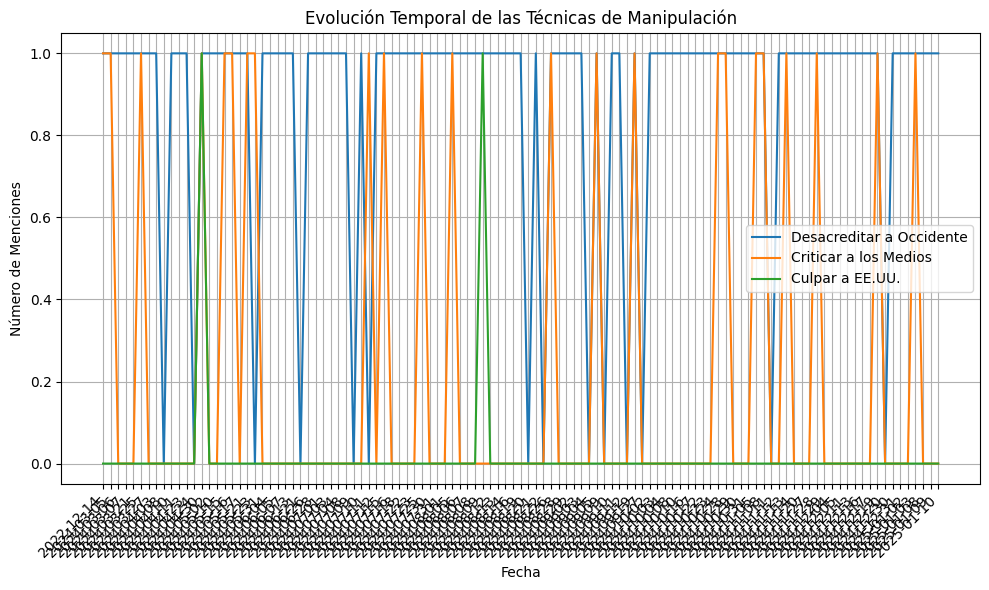

In [46]:
# ... (previous code for authentication, spreadsheet access, and analysis) ...

# Create and save plots for each timeline
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot for "Desacreditar a Occidente"
plt.plot(timeline_occidente['date_published'], timeline_occidente['occidente_mentions'], label='Desacreditar a Occidente')

# Plot for "Criticar a los Medios"
plt.plot(timeline_medios['date_published'], timeline_medios['medios_mentions'], label='Criticar a los Medios')

# Plot for "Culpar a EE.UU."
plt.plot(timeline_eeuu_culpa['date_published'], timeline_eeuu_culpa['eeuu_culpa_mentions'], label='Culpar a EE.UU.')

plt.xlabel('Fecha')
plt.ylabel('Número de Menciones')
plt.title('Evolución Temporal de las Técnicas de Manipulación')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('timeline_plot.png')  # Save the plot as an image file

# Update analysis_results with the plot image
analysis_results += """

**Evolución Temporal:**

![Timeline Plot](timeline_plot.png)
"""

# ... (rest of the code to write analysis_results to the "results2" sheet) ...

In [43]:
occidente_frases = df['text'].str.findall(r'(?i)(?:\bOccidente\b|\bEuropa\b|\bEEUU\b|\bOTAN\b).{0,50}')
# ... (Similar code for extracting phrases related to criticizing media and blaming the US) ...

# ... (Add your qualitative analysis and interpretation of the extracted phrases here) ...

analysis_results += """

**Análisis de Contexto:**

* (Resumen de los patrones, argumentos y estrategias observadas en las frases extraídas)
* (Ejemplos concretos de las transcripciones que ilustren las técnicas de manipulación)
"""

In [63]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib gspread
import gspread
from google.auth import default
from google.colab import auth
import pandas as pd

# Autenticación y acceso a la hoja de cálculo (código anterior)
# ...

# Crear un DataFrame con los datos de la columna H (código anterior)
# ...

# Contar las menciones de "jardín europeo" en la columna "text"
jardin_europeo_mentions = df['text'].str.contains("jardín europeo", case=False).sum()

print(f"Total de menciones de 'jardín europeo': {jardin_europeo_mentions}")

AttributeError: Can only use .str accessor with string values!

In [13]:
variantes_jardin = [
    "jardín", "jardín europeo", "jardín occidental", "nuestro jardín",
    "el jardín", "su jardín",  # Agrega más variantes relevantes
]

In [14]:
import re

menciones_jardin = []

for variante in variantes_jardin:
  for texto in df['text']:
    # Buscar la variante en el texto
    coincidencias = re.finditer(rf"\b{variante}\b", texto, re.IGNORECASE)

    for coincidencia in coincidencias:
      # Extraer contexto (por ejemplo, 50 caracteres antes y después)
      inicio = max(0, coincidencia.start() - 250)
      fin = min(len(texto), coincidencia.end() + 250)
      contexto = texto[inicio:fin]

      menciones_jardin.append({
          "variante": variante,
          "contexto": contexto
      })

# Convertir a DataFrame para mejor visualización
df_menciones = pd.DataFrame(menciones_jardin)
print(df_menciones)
# ... (código anterior para buscar menciones y crear df_menciones) ...

# Guardar en la hoja "jardin"
try:
  # Intentar obtener la hoja "jardin" si ya existe
  jardin_worksheet = sh.worksheet('jardin')
except gspread.exceptions.WorksheetNotFound:
  # Si no existe, crear una nueva hoja
  jardin_worksheet = sh.add_worksheet(title='jardin', rows=100, cols=100)

# Convertir el DataFrame a una lista de listas para escribir en la hoja
jardin_data = [df_menciones.columns.tolist()] + df_menciones.values.tolist()

# Escribir los datos en la hoja
jardin_worksheet.update('A1', jardin_data)

print("Resultados guardados en la hoja 'jardin'")

KeyError: 'text'

In [16]:
import re
import pandas as pd

# Define the variants of "jardín"
variantes_jardin = [
    "jardín", "jardín europeo", "jardín occidental", "nuestro jardín",
    "el jardín", "su jardín"  # Add more variants as needed
]

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/subtitles/subtitles-text-all.csv')

# Assuming the text column in your CSV is named 'text'
# If it's different, replace 'text' with the actual column name
text_column = df['text_transcription']

# Initialize an empty list to store mentions and contexts
menciones_jardin = []

# Iterate through variants and text
for variante in variantes_jardin:
    for index, texto in text_column.items():  # Iterate over Series with index
        coincidencias = re.finditer(rf"\b{variante}\b", texto, re.IGNORECASE)
        for coincidencia in coincidencias:
            # Adjust the context window as needed
            inicio = max(0, coincidencia.start() - 250)
            fin = min(len(texto), coincidencia.end() + 250)
            contexto = texto[inicio:fin]
            # Add index to results
            menciones_jardin.append({
                "variante": variante,
                "contexto": contexto,
                "index": index  # Store the original index from the DataFrame
            })

# Create a DataFrame from the results
df_menciones = pd.DataFrame(menciones_jardin)

# Print the results
print(df_menciones)

      variante                                           contexto  index
0       jardín  arcía muchísimos en un\ndeterminado igual en u...     48
1       jardín  n jardín de\ndías a otro entonces creo que nin...     48
2       jardín  sis\ngracias por atender a la base tenemos\nta...     52
3       jardín  y distintas y por eso se está\nconvirtiendo en...     52
4       jardín  arán de esto para intentar\ncriminalizar a sus...     61
..         ...                                                ...    ...
225  el jardín  1991 y\nhasta el último ucraniano como han dic...    445
226  el jardín  flexibilidad y margen para inversiones\npero o...    448
227  el jardín   simple cambio de un\ncolonizador por otro pue...    471
228  el jardín  \nrealmente concretando en nada este culto\na ...    472
229  su jardín   convertía ya con Gustavo\nPetro en un actor c...    215

[230 rows x 3 columns]


In [154]:
import re
import pandas as pd

# Define the variants of "jardín"
variantes_jardin = [
    "jardín", "jardín europeo", "jardín occidental", "nuestro jardín",
    "el jardín", "su jardín"  # Add more variants as needed
]

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/subtitles-text-all.csv')

# Check the actual column names in your DataFrame
print(df.columns)

# Assuming the text column in your CSV is named 'text' or something similar
# Replace 'text' with the actual name of your text column from the output above
text_column_name = 'Subtitle'  # Or whatever the name is
text_column = df[text_column_name]

# Initialize an empty list to store mentions and contexts
menciones_jardin = []

# Iterate through variants and text
for variante in variantes_jardin:
    for index, texto in text_column.items():  # Iterate over Series with index
        coincidencias = re.finditer(rf"\b{variante}\b", texto, re.IGNORECASE)
        for coincidencia in coincidencias:
            # Adjust the context window as needed
            inicio = max(0, coincidencia.start() - 250)
            fin = min(len(texto), coincidencia.end() + 250)
            contexto = texto[inicio:fin]
            # Add index to results
            menciones_jardin.append({
                "variante": variante,
                "contexto": contexto,
                "index": index  # Store the original index from the DataFrame
            })

# Create a DataFrame from the results
df_menciones = pd.DataFrame(menciones_jardin)

# Print the results
print(df_menciones)



Index(['file_name', 'text_transcription'], dtype='object')


KeyError: 'Subtitle'

In [18]:
import re
import pandas as pd

# Define the variants of "jardín"
variantes_jardin = [
    "jardín", "jardín europeo", "jardín occidental", "nuestro jardín",
    "el jardín", "su jardín"  # Add more variants as needed
]

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/subtitles/subtitles-text-all.csv')

# Access the 'text_transcription' column
text_column = df['text_transcription']

# Initialize an empty list to store mentions and contexts
menciones_jardin = []

# Iterate through variants and text
for variante in variantes_jardin:
    for index, texto in text_column.items():  # Iterate over Series with index
        coincidencias = re.finditer(rf"\b{variante}\b", texto, re.IGNORECASE)
        for coincidencia in coincidencias:
            # Adjust the context window as needed
            inicio = max(0, coincidencia.start() - 250)
            fin = min(len(texto), coincidencia.end() + 250)
            contexto = texto[inicio:fin]
            # Add index and file_name to results
            menciones_jardin.append({
                "variante": variante,
                "contexto": contexto,
                "index": index,
                "file_name": df.loc[index, 'file_name']  # Get file_name from the DataFrame
            })

# Create a DataFrame from the results
df_menciones = pd.DataFrame(menciones_jardin)

# Store results in results.txt
with open('results.txt', 'w', encoding='utf-8') as f:
    f.write(df_menciones.to_string())  # Use to_string() to write the DataFrame as a formatted string

print("Results stored in results.txt")

Results stored in results.txt


In [19]:
import re
import pandas as pd

# Define variants of "de Ucrania" and related terms
variantes_ucrania = ["de ucrania", "ucrania", "ucraniano", "ucranianos","guerra de ucrania"]  # Add more variants as needed
terminos_relacionados = ["invasión", "conflicto", "guerra", "operación militar especial", "nazis", "otan"]

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/subtitles/subtitles-text-all.csv')

# Initialize a list to store results
resultados_ucrania = []

# Iterate through transcripts
for index, texto in df['text_transcription'].items():
    for variante in variantes_ucrania:
        coincidencias = re.finditer(rf"\b{variante}\b", texto, re.IGNORECASE)
        for coincidencia in coincidencias:
            inicio = max(0, coincidencia.start() - 250)
            fin = min(len(texto), coincidencia.end() + 250)
            contexto = texto[inicio:fin]

            # Check for related terms in the context
            connotaciones = [
                termino for termino in terminos_relacionados
                if re.search(rf"\b{termino}\b", contexto, re.IGNORECASE)
            ]

            resultados_ucrania.append({
                "variante": variante,
                "contexto": contexto,
                "file_name": df.loc[index, 'file_name'],
                "connotaciones": connotaciones,
            })

# Create a DataFrame from results
df_resultados_ucrania = pd.DataFrame(resultados_ucrania)

# Group by file name and count occurrences
conteo_por_video = df_resultados_ucrania.groupby('file_name')['variante'].count().reset_index()
conteo_por_video = conteo_por_video.rename(columns={'variante': 'conteo'})

# Concatenate DataFrames
df_final = pd.concat([df_resultados_ucrania, conteo_por_video], ignore_index=True)

# Save to a CSV file
df_final.to_csv('resultados_ninos.csv', index=False, encoding='utf-8')

print("Resultados guardados en resultados_ucrania.csv")

Resultados guardados en resultados_ucrania.csv


In [22]:
import re
import pandas as pd

# Define search terms related to children and conflicts
variantes_ninos = ["niño", "niña", "niños", "niñas", "infancia", "menores"]
conflictos = ["gaza", "palestina","israel","rusia", "ucrania", "guerra", "conflicto", "ataque", "bombardeo"]
critica = ["sufrimiento", "dolor", "muerte", "víctimas", "inocentes", "genocidio", "tragedia"]

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/subtitles/subtitles-text-all.csv')

# Initialize a list to store results
resultados_ninos = []

# Iterate through transcripts
for index, texto in df['text_transcription'].items():
    for variante_nino in variantes_ninos:
        coincidencias_ninos = re.finditer(rf"\b{variante_nino}\b", texto, re.IGNORECASE)
        for coincidencia_nino in coincidencias_ninos:
            inicio = max(0, coincidencia_nino.start() - 250)
            fin = min(len(texto), coincidencia_nino.end() + 250)
            contexto = texto[inicio:fin]

            # Check for conflict and criticism terms in the context
            connotaciones_conflicto = [
                termino for termino in conflictos
                if re.search(rf"\b{termino}\b", contexto, re.IGNORECASE)
            ]
            connotaciones_critica = [
                termino for termino in critica
                if re.search(rf"\b{termino}\b", contexto, re.IGNORECASE)
            ]

            # Append results if both conflict and criticism terms are found
            if connotaciones_conflicto and connotaciones_critica:
                resultados_ninos.append({
                    "variante_nino": variante_nino,
                    "contexto": contexto,
                    "file_name": df.loc[index, 'file_name'],
                    "connotaciones_conflicto": connotaciones_conflicto,
                    "connotaciones_critica": connotaciones_critica
                })

# Create a DataFrame from results
df_resultados_ninos = pd.DataFrame(resultados_ninos)

# Group by file name and count occurrences
conteo_por_video = df_resultados_ninos.groupby('file_name')['variante_nino'].count().reset_index()
conteo_por_video = conteo_por_video.rename(columns={'variante_nino': 'conteo'})

# Concatenate DataFrames
df_final = pd.concat([df_resultados_ninos, conteo_por_video], ignore_index=True)

# Save to a CSV file
df_final.to_csv('resultados_ninos2.csv', index=False, encoding='utf-8')

print("Resultados guardados en resultados_ninos.csv")

Resultados guardados en resultados_ninos.csv


In [21]:
import re
import pandas as pd

# --- MODIFIED SECTION START ---
# Define expanded search terms related to children, conflicts, and criticism

variantes_ninos = [
    # Original
    "niño", "niña", "niños", "niñas", "infancia", "menores",
    # Added Specific age groups
    "bebé", "bebés", "adolescente", "adolescentes", "joven", "jóvenes",
    # Added Formal terms
    "menor de edad", "infante", "párvulo",
    # Added Colloquial terms (consider regional variations)
    "chaval", "chavala", "chiquillo", "chiquilla", "crío", "cría",
    # Added Family-related (use with caution)
    "hijo", "hija", "hijos", "hijas"
]

conflictos = [
    # Original
    "gaza", "palestina","israel","rusia", "ucrania", "guerra", "conflicto", "ataque", "bombardeo",
    # Added Types of conflict
    "guerra civil", "terrorismo", "violencia", "agresión", "invasión", "ocupación", "asedio",
    # Added Specific events or locations
    "Donbass", "Siria", "Afganistán", "Irak", "11-S",
    # Added Military terms
    "tropas", "soldados", "armamento", "bombas", "misiles", "bajas",
    # Added Political terms
    "sanciones", "embargo", "negociaciones", "tregua", "alto el fuego"
]

critica = [
    # Original
    "sufrimiento", "dolor", "muerte", "víctimas", "inocentes", "genocidio", "tragedia",
    # Added Emotional distress
    "miedo", "terror", "angustia", "desesperación", "trauma", "estrés postraumático",
    # Added Physical harm
    "heridas", "lesiones", "mutilaciones", "discapacidad", "enfermedad", "hambre", "desnutrición",
    # Added Social impact
    "desplazamiento", "refugiados", "migración", "pobreza", "desigualdad", "injusticia",
    # Added Moral condemnation
    "crueldad", "barbarie", "inhumanidad", "atrocidad", "crimen de guerra", "violación de derechos humanos"
]
# --- MODIFIED SECTION END ---


# Load the CSV file
# Make sure the path is correct for your environment
file_path = '/content/drive/MyDrive/subtitles/subtitles-text-all.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Archivo '{file_path}' cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no fue encontrado.")
    print("Por favor, asegúrate de que el archivo está en la ubicación correcta o ajusta la ruta.")
    exit() # Exit if the file isn't found
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")
    exit()

# Initialize a list to store results
resultados_ninos = []

print("Procesando transcripciones...")
# Iterate through transcripts
# Use iterrows() for potentially better readability when accessing multiple columns like index and text
for index, row in df.iterrows():
    texto = row['text_transcription']
    file_name = row['file_name']

    # Handle potential NaN values in text_transcription
    if pd.isna(texto):
        # print(f"Advertencia: Fila {index} ('{file_name}') tiene texto vacío. Saltando.")
        continue # Skip rows with no text

    texto = str(texto) # Ensure text is string type

    for variante_nino in variantes_ninos:
        # Use try-except for potential regex errors (unlikely with these patterns but good practice)
        try:
            # Find all non-overlapping matches for the child-related term (case-insensitive, whole word)
            coincidencias_ninos = re.finditer(rf"\b{variante_nino}\b", texto, re.IGNORECASE)
        except re.error as e:
            print(f"Error de Regex con el término '{variante_nino}' en el archivo '{file_name}': {e}")
            continue # Skip this term if regex fails

        for coincidencia_nino in coincidencias_ninos:
            # Define context window around the found term
            inicio = max(0, coincidencia_nino.start() - 250)
            fin = min(len(texto), coincidencia_nino.end() + 250)
            contexto = texto[inicio:fin]

            # Check for conflict terms in the context (case-insensitive, whole word)
            connotaciones_conflicto_encontradas = [
                termino for termino in conflictos
                if re.search(rf"\b{termino}\b", contexto, re.IGNORECASE)
            ]
            # Check for criticism/negative consequence terms in the context (case-insensitive, whole word)
            connotaciones_critica_encontradas = [
                termino for termino in critica
                if re.search(rf"\b{termino}\b", contexto, re.IGNORECASE)
            ]

            # Append results ONLY if BOTH conflict and criticism terms are found in the context
            if connotaciones_conflicto_encontradas and connotaciones_critica_encontradas:
                resultados_ninos.append({
                    "variante_nino_encontrada": variante_nino,
                    "contexto": contexto.strip(), # Remove leading/trailing whitespace from context
                    "file_name": file_name,
                    # Join lists into comma-separated strings for better CSV compatibility
                    "terminos_conflicto_contexto": ", ".join(sorted(list(set(connotaciones_conflicto_encontradas)))),
                    "terminos_critica_contexto": ", ".join(sorted(list(set(connotaciones_critica_encontradas))))
                })

print(f"Procesamiento completado. Se encontraron {len(resultados_ninos)} coincidencias iniciales.")

# Create a DataFrame from results
if resultados_ninos: # Proceed only if results were found
    df_resultados_ninos = pd.DataFrame(resultados_ninos)

    # --- Aggregation ---
    # Group by file name and count total occurrences (matches) per file
    conteo_por_video = df_resultados_ninos.groupby('file_name').size().reset_index(name='conteo_total_por_video')
    # size() is slightly more direct here than grouping by a column and using count()

    # Merge the total count for each file onto the detailed results DataFrame
    # This adds the 'conteo_total_por_video' column to each row, showing the total matches in that file
    df_final = pd.merge(df_resultados_ninos, conteo_por_video, on='file_name', how='left')
    print("El conteo total de coincidencias por video se ha añadido a cada fila de resultado correspondiente.")

    # --- Save to CSV ---
    output_filename = 'resultados_ninos_expandido.csv'
    try:
        # Reorder columns for potentially better readability
        column_order = ['file_name', 'conteo_total_por_video', 'variante_nino_encontrada',
                        'terminos_conflicto_contexto', 'terminos_critica_contexto', 'contexto']
        df_final = df_final[column_order]

        df_final.to_csv(output_filename, index=False, encoding='utf-8')
        print(f"Resultados guardados en {output_filename}")
    except Exception as e:
        print(f"Error al guardar el archivo CSV '{output_filename}': {e}")

else:
    print("No se encontraron coincidencias que cumplan todos los criterios (término infantil + término de conflicto + término de crítica en el contexto).")


Archivo '/content/drive/MyDrive/subtitles/subtitles-text-all.csv' cargado exitosamente.
Procesando transcripciones...
Procesamiento completado. Se encontraron 219 coincidencias iniciales.
El conteo total de coincidencias por video se ha añadido a cada fila de resultado correspondiente.
Resultados guardados en resultados_ninos_expandido.csv


In [12]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/subtitles/subtitles-text-all.csv')

# Find the index of the row to delete
index_to_delete = df[df['file_name'] == 'La Base 4x120 _ Israel continúa su Genoc_dio y ataca a Irán para provocar la guerra (Spanish_ASR).srt'].index

# Delete the row
if len(index_to_delete) > 0:
    df = df.drop(index_to_delete)
    print("Row deleted successfully.")
else:
    print("Row not found.")

# Save the updated DataFrame back to the CSV file
df.to_csv('/content/drive/MyDrive/subtitles/subtitles-text-all.csv', index=False)

Row deleted successfully.


In [24]:
import re
import pandas as pd

# Define the variants of "jardín"
variantes_jardin = [
    "jardín", "jardín europeo", "jardín occidental", "nuestro jardín",
    "el jardín", "su jardín"  # Add more variants as needed
]

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/subtitles-text-all.csv')

# Access the 'text_transcription' column
text_column = df['text_transcription']

# Initialize an empty list to store mentions and contexts
menciones_jardin = []

# Iterate through variants and text
for variante in variantes_jardin:
    for index, texto in text_column.items():  # Iterate over Series with index
        coincidencias = re.finditer(rf"\b{variante}\b", texto, re.IGNORECASE)
        for coincidencia in coincidencias:
            # Adjust the context window as needed
            inicio = max(0, coincidencia.start() - 250)
            fin = min(len(texto), coincidencia.end() + 250)
            contexto = texto[inicio:fin]
            # Add index to results
            menciones_jardin.append({
                "variante": variante,
                "contexto": contexto,
                "index": index  # Store the original index from the DataFrame
            })

# Create a DataFrame from the results
df_menciones = pd.DataFrame(menciones_jardin)

# Print the results
print(df_menciones)

      variante                                           contexto  index
0       jardín  nuestro verdadero enemigo es el estado\nel est...      2
1       jardín  nuestro verdadero enemigo es el estado\nel est...      8
2       jardín  e\ntras oficializarse la ruptura de su\ncoalic...     17
3       jardín   en fin máo el que no\nquiere ver terminamos c...     27
4       jardín   Duelo\nsabéis no lo de uno negación dos rabia...     27
..         ...                                                ...    ...
285  el jardín  ntes cobre estaño caucho mucha\nmucha mucha ri...    533
286  el jardín  on tantos votos a\nfavor y tantos votos en con...    538
287  el jardín  dán al mediterráneo Ah cómo cómo cómo\na ver s...    548
288  el jardín  ril de este año lo dijo también borr\nla guerr...    549
289  su jardín   convertía ya con Gustavo\nPetro en un actor c...    381

[290 rows x 3 columns]


In [23]:
import re
import pandas as pd

# --- 1. Definiciones ---

# Palabras clave de violencia y sus variantes (ampliable)
# Usamos raíces y formas comunes para capturar conjugaciones
palabras_violencia = [
    # Matar
    r"matar", r"mata(?:n|s|mos|is|d|rse)?", r"mató", r"mataron", r"matado[as]?", r"matando", r"matanza[s]?",
    # Asesinar
    r"asesinar", r"asesina(?:n|s|mos|is|d[oa]s?)?", r"asesinó", r"asesinaron", r"asesinato[s]?", r"asesinando",
    # Genocidio
    r"genocidio[s]?", r"genocida[s]?"
]

# Palabras clave para identificar conflictos (ampliable)
keywords_ru_ua = [
    "Rusia", "ruso[s]?", "rusa[s]?", "Ucrania", "ucraniano[s]?", "ucraniana[s]?",
    "Kyiv", "Kiev", "Moscú", "Kremlin", "Putin", "Zelensky", "Donbas", "Crimea",
    "invasión", "guerra en Ucrania" # Términos más específicos
]

keywords_is_pa = [
    "Israel", "israelí(?:es)?", "Palestina", "palestino[s]?", "palestina[s]?",
    "Gaza", "Cisjordania", "Hamas", "Netanyahu", "Abbas", "Jerusalén",
    "Tel Aviv", "conflicto israeli-palestino", "franja de Gaza" # Términos más específicos
]

# --- 2. Carga de Datos ---

try:
    # Asegúrate de que la ruta al archivo es correcta
    df = pd.read_csv('/content/subtitles-text-all.csv')
    # Verifica si la columna existe
    if 'text_transcription' not in df.columns:
        raise ValueError("La columna 'text_transcription' no se encuentra en el CSV.")
    text_column = df['text_transcription'].astype(str) # Asegura que sea string y maneja NaNs
except FileNotFoundError:
    print("Error: El archivo '/content/subtitles-text-all.csv' no fue encontrado.")
    exit()
except ValueError as ve:
    print(ve)
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar el CSV: {e}")
    exit()


# --- 3. Procesamiento ---

# Compilar patrones regex para eficiencia
# Une todas las variantes de violencia en un solo patrón
patron_violencia = re.compile(r"\b(" + "|".join(palabras_violencia) + r")\b", re.IGNORECASE)
patron_ru_ua = re.compile(r"\b(" + "|".join(keywords_ru_ua) + r")\b", re.IGNORECASE)
patron_is_pa = re.compile(r"\b(" + "|".join(keywords_is_pa) + r")\b", re.IGNORECASE)

menciones_violencia = []
context_window = 300 # Ampliamos un poco la ventana para buscar keywords de conflicto

# Iterar a través de cada texto en la columna
for index, texto in text_column.items():
    if pd.isna(texto): # Saltar valores nulos o NaN
        continue

    # Buscar todas las ocurrencias de las palabras de violencia en el texto actual
    coincidencias = patron_violencia.finditer(texto)

    for coincidencia in coincidencias:
        palabra_encontrada = coincidencia.group(0) # La palabra específica que coincidió

        # Extraer contexto alrededor de la palabra encontrada
        inicio = max(0, coincidencia.start() - context_window)
        fin = min(len(texto), coincidencia.end() + context_window)
        contexto = texto[inicio:fin]

        # Intentar determinar el conflicto buscando keywords en el contexto
        conflicto_probable = "Indeterminado"
        found_ru_ua = bool(patron_ru_ua.search(contexto))
        found_is_pa = bool(patron_is_pa.search(contexto))

        if found_ru_ua and found_is_pa:
            conflicto_probable = "Ambos?" # Podría mencionar ambos
        elif found_ru_ua:
            conflicto_probable = "Rusia-Ucrania"
        elif found_is_pa:
            conflicto_probable = "Israel-Palestina"
        # Si no se encuentra ninguna keyword, se queda como "Indeterminado"

        # Guardar la información
        menciones_violencia.append({
            "palabra_encontrada": palabra_encontrada.lower(), # Guardar en minúsculas para agrupar fácil
            "contexto": contexto,
            "conflicto_probable": conflicto_probable,
            "index": index  # Guardar el índice original del DataFrame
        })

# --- 4. Resultados ---

# Crear un DataFrame con las menciones encontradas
df_menciones = pd.DataFrame(menciones_violencia)

# Imprimir las primeras filas del DataFrame de menciones (opcional)
print("--- Menciones encontradas y contexto ---")
if not df_menciones.empty:
    print(df_menciones.head()) # Muestra las primeras 5 por defecto
else:
    print("No se encontraron menciones de las palabras buscadas.")

print("\n--- Resumen de Frecuencias ---")

if not df_menciones.empty:
    # Contar cuántas veces aparece cada palabra/variante encontrada
    print("\nFrecuencia por palabra/variante:")
    print(df_menciones['palabra_encontrada'].value_counts())

    # Contar cuántas menciones se asociaron (probablemente) a cada conflicto
    print("\nFrecuencia por conflicto probable:")
    print(df_menciones['conflicto_probable'].value_counts())
else:
    print("No hay datos para generar resúmenes.")

# Puedes guardar este DataFrame si lo necesitas:
# df_menciones.to_csv('menciones_violencia_contexto.csv', index=False)


Error: El archivo '/content/subtitles-text-all.csv' no fue encontrado.
--- Menciones encontradas y contexto ---
  palabra_encontrada                                           contexto  \
0               mata  al tiene bastante\nmérito que tal mano que est...   
1         asesinatos  nemos unas leyes que se podrían\nconsiderar tr...   
2               mata  a un punto\nasí en que la democracia esté tan ...   
3               mata  ro que entonces los medios se echen\npara atrá...   
4               mata  do tarde\nefectivamente muchas gracias ahora\n...   

  conflicto_probable  index  
0      Indeterminado      1  
1      Indeterminado      1  
2      Indeterminado      1  
3      Indeterminado      1  
4      Indeterminado      1  

--- Resumen de Frecuencias ---

Frecuencia por palabra/variante:
palabra_encontrada
genocidio     982
asesinato     328
matar         180
asesinados    167
asesinatos    150
asesinado     129
mata           97
genocida       96
matanza        89
asesinar  

In [45]:
results_worksheet = sh.worksheet('results2')  # Get the "results2" sheet
results_worksheet.update_acell('A1', analysis_results)  # Write the analysis to cell A1

print("Detailed analysis written to 'results2' sheet.")

Detailed analysis written to 'results2' sheet.


## Counting files in the folder

In [8]:
import os
import ipywidgets as widgets
from IPython.display import display
from google.colab import files

def count_files(folder_path):
  """Counts the number of files in a given folder."""
  num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
  print(f"Number of files in {folder_path}: {num_files}")

# Create a text input widget for the folder path
folder_path_input = widgets.Text(
    placeholder='Enter folder path here',
    description='Folder Path:',
)

# Create a button widget
button = widgets.Button(description="Count Files")

# Define a function to handle button clicks
def on_button_clicked(b):
  """Gets the folder path from the input widget and calls count_files."""
  folder_path = folder_path_input.value  # Get the folder path from the input widget
  count_files(folder_path)  # Directly call count_files with the folder path

# Attach the click handler to the button
button.on_click(on_button_clicked)

# Display the input widget and button
display(folder_path_input, button)

Text(value='', description='Folder Path:', placeholder='Enter folder path here')

Button(description='Count Files', style=ButtonStyle())

In [94]:
from google.colab import files
import io
import re
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

# Authenticate with Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet_id = 'your_spreadsheet_id'  # Replace with your Google Sheet ID
sh = gc.open_by_key(spreadsheet_id)
worksheet = sh.worksheet('Sheet5')  # Select the 'Sheet5' sheet

# Function to extract text from SRT file
def extract_text_from_srt(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        srt_content = f.read()
        text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
        text_transcription = text_transcription.replace('\n\n', '\n')
        return text_transcription

# Upload button
uploaded = files.upload()

# Process uploaded files
data = []
for filename, content in uploaded.items():
    if filename.endswith('.srt'):
        text_transcription = extract_text_from_srt(io.StringIO(content.decode('utf-8')))
        data.append([text_transcription, filename])

# Create DataFrame
df = pd.DataFrame(data, columns=['text_transcription', 'file_name'])

# Write DataFrame to Google Sheet
worksheet.update([df.columns.values.tolist()] + df.values.tolist())

print("Subtitle data written to Google Sheet.")

SpreadsheetNotFound: <Response [404]>

In [89]:
import os
import hashlib
import re

# ... (previous code for analyze_folder function) ...

# ... (call analyze_folder to get unique_files and duplicate_files) ...

# Check for files with the same YouTube ID
youtube_ids = {}
files_with_same_youtube_id = []

for file_path, _ in unique_files:
    filename = os.path.basename(file_path)
    # Extract YouTube ID (assuming it's at the beginning of the filename)
    match = re.search(r'^([a-zA-Z0-9_-]+)', filename)
    if match:
        youtube_id = match.group(1)
        if youtube_id in youtube_ids:
            files_with_same_youtube_id.append((file_path, youtube_ids[youtube_id]))
        else:
            youtube_ids[youtube_id] = file_path

print("\nFiles with the same YouTube ID:")
for file1, file2 in files_with_same_youtube_id:
    print(f"- {file1} and {file2}")


Files with the same YouTube ID:


In [84]:
# Authenticate with Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet_id = '18R42d8LLQCCXuqIWeOyRJvEEV8hou6Cr0JPApNalOcw'  # Replace with your Google Sheet ID
sh = gc.open_by_key(spreadsheet_id)
worksheet = sh.worksheet('Sheet2')  # Select the 'Sheet1' sheet

# Folder path
folder_path = '/content/drive/MyDrive/subs/a'

# Function to extract text from SRT file
def extract_text_from_srt(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        srt_content = f.read()
        text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
        text_transcription = text_transcription.replace('\n\n', '\n')
        return text_transcription, srt_content

# Process files in the folder
data = []
seen_files = set()  # To track processed files and detect duplicates
for filename in os.listdir(folder_path):
    if filename.endswith('.srt'):
        file_path = os.path.join(folder_path, filename)

        # Check for duplicates based on file content
        with open(file_path, 'r', encoding='utf-8') as f:
            file_content = f.read()
        if file_content in seen_files:
            print(f"Duplicate file found: {filename}")
            continue  # Skip duplicate files
        seen_files.add(file_content)

        # Extract data
        text_transcription, srt_content = extract_text_from_srt(file_path)

        # Append data to the list
        data.append([srt_content, filename, text_transcription])  # Add more columns as needed

# Create DataFrame
df = pd.DataFrame(data, columns=['subtitle_raw', 'file_name', 'text_transcription'])

# Split the 'subtitle_raw' column into chunks of less than 50,000 characters
chunk_size = 49000  # Set chunk size slightly below the limit

# Instead of writing the entire 'subtitle_raw' to a single cell, split it into multiple cells in the same row
df['subtitle_raw'] = df['subtitle_raw'].apply(lambda x: [x[i:i + chunk_size] for i in range(0, len(x), chunk_size)])
# Explode the 'subtitle_raw' column to create separate rows for each chunk
exploded_df = df.explode('subtitle_raw', ignore_index=True)

# Write exploded DataFrame to Google Sheet
# Get the maximum number of columns needed
max_cols = exploded_df['subtitle_raw'].str.len().max() + len(exploded_df.columns) -1

# Create a new sheet with enough columns
try:
  worksheet = sh.worksheet("Sheet3")
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title="Sheet3", rows="1000", cols=max_cols) # Adjust size if needed


# Iterate through the DataFrame and write each row to the Google Sheet
for index, row in exploded_df.iterrows():
    # Prepare the row data for writing
    row_data = row.tolist()
    # Write the row data to the Google Sheet
    worksheet.append_row(row_data, value_input_option='USER_ENTERED')

print("Subtitle data written to Google Sheet.")

APIError: APIError: [400]: Invalid requests[0].addSheet: This action would increase the number of columns in the sheet above the limit of 18278 columns.

In [87]:
# Authenticate with Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet_id = '18R42d8LLQCCXuqIWeOyRJvEEV8hou6Cr0JPApNalOcw'  # Replace with your Google Sheet ID
sh = gc.open_by_key(spreadsheet_id)

# Folder path
folder_path = '/content/drive/MyDrive/subs/a'

# Function to extract text from SRT file
def extract_text_from_srt(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        srt_content = f.read()
        text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
        text_transcription = text_transcription.replace('\n\n', '\n')
        return text_transcription

# Process files in the folder
data = []
seen_files = set()  # To track processed files and detect duplicates
for filename in os.listdir(folder_path):
    if filename.endswith('.srt'):
        file_path = os.path.join(folder_path, filename)

        # Check for duplicates based on file content
        with open(file_path, 'r', encoding='utf-8') as f:
            file_content = f.read()
        if file_content in seen_files:
            print(f"Duplicate file found: {filename}")
            continue  # Skip duplicate files
        seen_files.add(file_content)

        # Extract data
        text_transcription = extract_text_from_srt(file_path)

        # Append data to the list
        data.append([text_transcription, filename, file_path])  # Add more columns as needed

# Create DataFrame
df = pd.DataFrame(data, columns=['text_transcription', 'file_name', 'file_path'])

# Create or select worksheet
try:
    worksheet = sh.worksheet("Sheet3")
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title="Sheet3", rows="1000", cols=3) # Adjust if needed

# Split the 'text_transcription' column into chunks of less than 50,000 characters
chunk_size = 49000  # Set chunk size slightly below the limit
df['text_transcription'] = df['text_transcription'].apply(lambda x: [x[i:i + chunk_size] for i in range(0, len(x), chunk_size)])

# Explode the 'text_transcription' column to create separate rows for each chunk
df = df.explode('text_transcription', ignore_index=True)

# Write DataFrame to Google Sheet
worksheet.update([df.columns.values.tolist()] + df.values.tolist(), value_input_option='USER_ENTERED')

print("Subtitle data written to Google Sheet.")

Subtitle data written to Google Sheet.


In [96]:
from google.colab import files
import io
import re
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

# Authenticate with Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet_id = '18R42d8LLQCCXuqIWeOyRJvEEV8hou6Cr0JPApNalOcw'  # Replace with your Google Sheet ID
sh = gc.open_by_key(spreadsheet_id)
worksheet = sh.worksheet('Sheet5')  # Select the 'Sheet5' sheet

# Function to extract text from SRT file
def extract_text_from_srt(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        srt_content = f.read()
        text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
        text_transcription = text_transcription.replace('\n\n', '\n')
        return text_transcription

# Upload button
uploaded = files.upload()

# Process uploaded files
data = []
for filename, content in uploaded.items():
    if filename.endswith('.srt'):
        text_transcription = extract_text_from_srt(io.StringIO(content.decode('utf-8')))
        data.append([text_transcription, filename])

# Create DataFrame
df = pd.DataFrame(data, columns=['text_transcription', 'file_name'])

# Write DataFrame to Google Sheet
worksheet.update([df.columns.values.tolist()] + df.values.tolist())

print("Subtitle data written to Google Sheet.")

Saving La Base #1 - El poder mediático (Spanish_ASR).srt to La Base #1 - El poder mediático (Spanish_ASR).srt
Saving La Base #2 - Diplomacia o fragatas_ Mentiras y geopolítica en Ucrania (Spanish_ASR).srt to La Base #2 - Diplomacia o fragatas_ Mentiras y geopolítica en Ucrania (Spanish_ASR).srt
Saving La Base #3 - Gabriel Boric_ un nuevo tiempo en Chile (Spanish_ASR).srt to La Base #3 - Gabriel Boric_ un nuevo tiempo en Chile (Spanish_ASR).srt
Saving La Base #4 - Asalto en Lorca_ fachas, bulos e impunidad (Spanish_ASR).srt to La Base #4 - Asalto en Lorca_ fachas, bulos e impunidad (Spanish_ASR).srt
Saving La Base #5 - Reforma laboral_ avances, mentiras y medias verdades (Spanish_ASR).srt to La Base #5 - Reforma laboral_ avances, mentiras y medias verdades (Spanish_ASR).srt


TypeError: expected str, bytes or os.PathLike object, not StringIO

In [97]:
from google.colab import files
import io
import re
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

# Authenticate with Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet_id = '18R42d8LLQCCXuqIWeOyRJvEEV8hou6Cr0JPApNalOcw'  # Replace with your Google Sheet ID
sh = gc.open_by_key(spreadsheet_id)
worksheet = sh.worksheet('Sheet5')  # Select the 'Sheet5' sheet

# Function to extract text from SRT content (modified)
def extract_text_from_srt(srt_content):
    """
    Extracts text from SRT content (string).
    """
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

# Upload button
uploaded = files.upload()

# Process uploaded files
data = []
for filename, content in uploaded.items():
    if filename.endswith('.srt'):
        # Pass the content directly to extract_text_from_srt
        text_transcription = extract_text_from_srt(content.decode('utf-8'))
        data.append([text_transcription, filename])

# Create DataFrame
df = pd.DataFrame(data, columns=['text_transcription', 'file_name'])

# Write DataFrame to Google Sheet
worksheet.update([df.columns.values.tolist()] + df.values.tolist())

print("Subtitle data written to Google Sheet.")

Saving La Base #1 - El poder mediático (Spanish_ASR).srt to La Base #1 - El poder mediático (Spanish_ASR) (1).srt
Saving La Base #2 - Diplomacia o fragatas_ Mentiras y geopolítica en Ucrania (Spanish_ASR).srt to La Base #2 - Diplomacia o fragatas_ Mentiras y geopolítica en Ucrania (Spanish_ASR) (1).srt
Saving La Base #3 - Gabriel Boric_ un nuevo tiempo en Chile (Spanish_ASR).srt to La Base #3 - Gabriel Boric_ un nuevo tiempo en Chile (Spanish_ASR) (1).srt


APIError: APIError: [400]: Your input contains more than the maximum of 50000 characters in a single cell.

In [99]:
from google.colab import files
import io
import re
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

# Authenticate with Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet_id = '18R42d8LLQCCXuqIWeOyRJvEEV8hou6Cr0JPApNalOcw'  # Replace with your Google Sheet ID
sh = gc.open_by_key(spreadsheet_id)
worksheet = sh.worksheet('Sheet5')  # Select the 'Sheet5' sheet

# Function to extract text from SRT content (modified)
def extract_text_from_srt(srt_content):
    """
    Extracts text from SRT content (string).
    """
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

# Upload button
uploaded = files.upload()

# Process uploaded files
data = []
for filename, content in uploaded.items():
    if filename.endswith('.srt'):
        # Pass the content directly to extract_text_from_srt
        text_transcription = extract_text_from_srt(content.decode('utf-8'))

        # Split the text_transcription into chunks of 49000 characters
        chunk_size = 49000
        chunks = [text_transcription[i:i + chunk_size] for i in range(0, len(text_transcription), chunk_size)]

        # Append each chunk with filename to data
        for chunk in chunks:
            data.append([chunk, filename])

# Create DataFrame
df = pd.DataFrame(data, columns=['text_transcription', 'file_name'])

# Write DataFrame to Google Sheet
worksheet.update([df.columns.values.tolist()] + df.values.tolist())

print("Subtitle data written to Google Sheet.")

Saving La Base #2 - Diplomacia o fragatas_ Mentiras y geopolítica en Ucrania (Spanish_ASR).srt to La Base #2 - Diplomacia o fragatas_ Mentiras y geopolítica en Ucrania (Spanish_ASR) (2).srt
Subtitle data written to Google Sheet.


In [101]:
from google.colab import files
import io
import re
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

# Authenticate with Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet_id = '18R42d8LLQCCXuqIWeOyRJvEEV8hou6Cr0JPApNalOcw'  # Replace with your Google Sheet ID
sh = gc.open_by_key(spreadsheet_id)
worksheet = sh.worksheet('Sheet5')  # Select the 'Sheet5' sheet

# Function to extract text from SRT content (modified)
def extract_text_from_srt(srt_content):
    """
    Extracts text from SRT content (string).
    """
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

# Upload button
uploaded = files.upload()

# Process uploaded files
data = []
for filename, content in uploaded.items():
    if filename.endswith('.srt'):
        # Pass the content directly to extract_text_from_srt
        text_transcription = extract_text_from_srt(content.decode('utf-8'))

        # Split the text_transcription into chunks of 49000 characters
        chunk_size = 49000
        chunks = [text_transcription[i:i + chunk_size] for i in range(0, len(text_transcription), chunk_size)]

        # Append each chunk with filename to data
        for chunk in chunks:
            data.append([chunk, filename])

# Create DataFrame
df = pd.DataFrame(data, columns=['text_transcription', 'file_name'])

# Append data to the Google Sheet instead of overwriting
worksheet.append_rows(df.values.tolist(), value_input_option='USER_ENTERED')

print("Subtitle data appended to Google Sheet.")

Saving La Base #1 - El poder mediático (Spanish_ASR).srt to La Base #1 - El poder mediático (Spanish_ASR) (4).srt
Subtitle data appended to Google Sheet.


In [108]:
from google.colab import files
import io
import re
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

# Authenticate with Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet_id = '18R42d8LLQCCXuqIWeOyRJvEEV8hou6Cr0JPApNalOcw'  # Replace with your Google Sheet ID
sh = gc.open_by_key(spreadsheet_id)
worksheet = sh.worksheet('Sheet6')  # Select the 'Sheet5' sheet

# Function to extract text from SRT content (modified)
def extract_text_from_srt(srt_content):
    """
    Extracts text from SRT content (string).
    """
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

# Get existing file names from the Google Sheet
existing_filenames = worksheet.col_values(2)[1:]  # Get values from column B (file_name), skipping the header

# Upload button
uploaded = files.upload()

# Process uploaded files
data = []
for filename, content in uploaded.items():
    if filename.endswith('.srt') and filename not in existing_filenames:
        # Pass the content directly to extract_text_from_srt
        text_transcription = extract_text_from_srt(content.decode('utf-8'))

        # Split the text_transcription into chunks of 49000 characters
        chunk_size = 49000
        chunks = [text_transcription[i:i + chunk_size] for i in range(0, len(text_transcription), chunk_size)]

        # Append each chunk with filename and splitting part to data
        for i, chunk in enumerate(chunks):
            data.append([chunk, filename, f"Part {i + 1}"])

# Create DataFrame
df = pd.DataFrame(data, columns=['text_transcription', 'file_name', 'splitting_part'])

# Append data to the Google Sheet
worksheet.append_rows(df.values.tolist(), value_input_option='USER_ENTERED')

print("Subtitle data appended to Google Sheet.")

Saving La Base #14 - Ucrania_ rigor frente a propaganda (Spanish_ASR).srt to La Base #14 - Ucrania_ rigor frente a propaganda (Spanish_ASR).srt
Saving La Base #17 - Putin y Vox (Spanish_ASR).srt to La Base #17 - Putin y Vox (Spanish_ASR).srt
Subtitle data appended to Google Sheet.


In [125]:
from google.colab import files
import io
import re
import pandas as pd

def extract_text_from_srt(srt_content):
    """
    Extracts text from SRT content (string).
    """
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

# Upload button
uploaded = files.upload()

# Process uploaded files
data = []
for filename, content in uploaded.items():
    if filename.endswith('.srt'):
        # Pass the content directly to extract_text_from_srt
        text_transcription = extract_text_from_srt(content.decode('utf-8'))
        data.append([text_transcription, filename])

# Create DataFrame
df = pd.DataFrame(data, columns=['text_transcription', 'file_name'])

# Save DataFrame to CSV file
df.to_csv('subtitles-all.csv', index=False)

print("Subtitle data written to subtitles-all.csv")

Saving La Base 4x81 _ ¿Eurovisión _apolítico_ (Spanish_ASR).srt to La Base 4x81 _ ¿Eurovisión _apolítico_ (Spanish_ASR) (1).srt
Saving La Base 4x44 _ ¿Fallo de los Servicios de Inteligencia o LIMPIEZA ÉTNICA_ (Spanish_ASR).srt to La Base 4x44 _ ¿Fallo de los Servicios de Inteligencia o LIMPIEZA ÉTNICA_ (Spanish_ASR) (1).srt
Subtitle data written to subtitles-all.csv


In [126]:
import pandas as pd
import sqlite3

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/subtitles-all.csv')

# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a table in the SQLite database
df.to_sql('subtitles', conn, if_exists='replace', index=False)

2

In [127]:
# Get the CREATE TABLE statement from SQLite
cursor = conn.cursor()
cursor.execute("SELECT sql FROM sqlite_master WHERE type='table' AND name='subtitles'")
create_table_sql = cursor.fetchone()[0]

# Get the INSERT statements for the data
insert_sql = '\n'.join([f"INSERT INTO subtitles ({', '.join(df.columns)}) VALUES ({', '.join(['?' for _ in df.columns])});", *[str(tuple(row)) for row in df.values]])

# Combine the CREATE TABLE and INSERT statements into a single SQL script
sql_script = f"{create_table_sql}\n\n{insert_sql}"

# Save the SQL script to a file
with open('subtitles.sql', 'w') as f:
    f.write(sql_script)

print("SQL script saved to subtitles.sql")

SQL script saved to subtitles.sql


In [ ]:
from google.colab import files
import io
import re
import pandas as pd

def extract_text_from_srt(srt_content):
    """Extracts text from SRT content (string), removing timestamps."""
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

# Upload button
uploaded = files.upload()

# Process uploaded files
text_data = []  # For text without timestamps
raw_data = []   # For raw content with timestamps

for filename, content in uploaded.items():
    if filename.endswith('.srt'):
        srt_content = content.decode('utf-8')  # Get raw content

        # Extract text without timestamps
        text_transcription = extract_text_from_srt(srt_content)
        text_data.append([filename, text_transcription])

        # Store raw content with timestamps
        raw_data.append([filename, srt_content])

# Create DataFrames
df_text = pd.DataFrame(text_data, columns=['file_name', 'text_transcription'])
df_raw = pd.DataFrame(raw_data, columns=['file_name', 'subtitles'])

# Save DataFrames to CSV files
df_text.to_csv('subtitles-text-all.csv', index=False)
df_raw.to_csv('subtitles-raw-all.csv', index=False)

print("Subtitle data written to subtitles-text-all.csv and subtitles-raw-all.csv")

In [132]:
from google.colab import files
import io
import re
import pandas as pd
import os

def extract_text_from_srt(srt_content):
    """Extracts text from SRT content (string), removing timestamps."""
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

# Check if files exist and load existing data (if any)
if os.path.exists('subtitles-text-all.csv'):
    df_text = pd.read_csv('subtitles-text-all.csv')
else:
    df_text = pd.DataFrame(columns=['file_name', 'text_transcription'])

if os.path.exists('subtitles-raw-all.csv'):
    df_raw = pd.read_csv('subtitles-raw-all.csv')
else:
    df_raw = pd.DataFrame(columns=['file_name', 'subtitles'])

# Upload button
uploaded = files.upload()

# Process uploaded files
text_data = []
raw_data = []

for filename, content in uploaded.items():
    if filename.endswith('.srt') and filename not in df_text['file_name'].values and filename not in df_raw['file_name'].values:
        srt_content = content.decode('utf-8')

        # Extract text without timestamps
        text_transcription = extract_text_from_srt(srt_content)
        text_data.append([filename, text_transcription])

        # Store raw content with timestamps
        raw_data.append([filename, srt_content])
    else:
        print(f"Skipping duplicate file: {filename}")

# Append new data to DataFrames
df_text = pd.concat([df_text, pd.DataFrame(text_data, columns=df_text.columns)], ignore_index=True)
df_raw = pd.concat([df_raw, pd.DataFrame(raw_data, columns=df_raw.columns)], ignore_index=True)

# Save DataFrames to CSV files
df_text.to_csv('subtitles-text-all.csv', index=False)
df_raw.to_csv('subtitles-raw-all.csv', index=False)

print("Subtitle data written to subtitles-text-all.csv and subtitles-raw-all.csv")

KeyboardInterrupt: 

In [ ]:
import os

def list_srt_files(directory):
  """Lists all SRT files in the specified directory."""
  srt_files = []
  for filename in os.listdir(directory):
    if filename.endswith('.srt'):
      srt_files.append(filename)
  return srt_files

# Get the list of SRT files in /content
srt_files_list = list_srt_files('/content')

# Print the list
print("SRT files in /content:")
for file in srt_files_list:
  print(file)

In [134]:
import os
import ipywidgets as widgets
from IPython.display import display

def list_srt_files(directory):
  """Lists all SRT files in the specified directory."""
  srt_files = []
  for filename in os.listdir(directory):
    if filename.endswith('.srt'):
      srt_files.append(filename)
  return srt_files

def delete_selected_files(change):
  """Deletes the selected files."""
  selected_files = [file for file, selected in change['new'].items() if selected]
  for file in selected_files:
    file_path = os.path.join('/content', file)  # Add directory path
    os.remove(file_path)
  print(f"Deleted files: {', '.join(selected_files)}")

# Get the list of SRT files in /content
srt_files_list = list_srt_files('/content')

# Create a selection widget
file_selector = widgets.SelectMultiple(
    options=srt_files_list,
    description='Select files to delete:',
    disabled=False
)

# Observe the selection widget for changes
file_selector.observe(delete_selected_files, names='value')

# Display the widget and a delete button
display(file_selector)
delete_button = widgets.Button(description="Delete Selected Files")
display(delete_button)

def on_delete_button_clicked(b):
  delete_selected_files({'new': {file: file in file_selector.value for file in srt_files_list}})

delete_button.on_click(on_delete_button_clicked)

SelectMultiple(description='Select files to delete:', options=(), value=())

Button(description='Delete Selected Files', style=ButtonStyle())

In [135]:
from google.colab import files
import io
import re
import pandas as pd
import os

def extract_text_from_srt(srt_content):
    """Extracts text from SRT content (string), removing timestamps."""
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

# Check if files exist and load existing data (if any)
if os.path.exists('subtitles-text-all.csv'):
    df_text = pd.read_csv('subtitles-text-all.csv')
else:
    df_text = pd.DataFrame(columns=['file_name', 'text_transcription'])

if os.path.exists('subtitles-raw-all.csv'):
    df_raw = pd.read_csv('subtitles-raw-all.csv')
else:
    df_raw = pd.DataFrame(columns=['file_name', 'subtitles'])

# Upload button
uploaded = files.upload()

# Process uploaded files
text_data = []
raw_data = []

for filename, content in uploaded.items():
    if filename.endswith('.srt') and filename not in df_text['file_name'].values and filename not in df_raw['file_name'].values:
        srt_content = content.decode('utf-8')

        # Extract text without timestamps
        text_transcription = extract_text_from_srt(srt_content)
        text_data.append([filename, text_transcription])

        # Store raw content with timestamps
        raw_data.append([filename, srt_content])
    else:
        print(f"Skipping duplicate file: {filename}")

# Append new data to DataFrames
df_text = pd.concat([df_text, pd.DataFrame(text_data, columns=df_text.columns)], ignore_index=True)
df_raw = pd.concat([df_raw, pd.DataFrame(raw_data, columns=df_raw.columns)], ignore_index=True)

# Save DataFrames to CSV files
df_text.to_csv('subtitles-text-all.csv', index=False)
df_raw.to_csv('subtitles-raw-all.csv', index=False)

print("Subtitle data written to subtitles-text-all.csv and subtitles-raw-all.csv")

KeyboardInterrupt: 

## Subtitle Processing and Upload
This code snippet is designed to process SRT (SubRip Subtitle) files, extract the subtitle text, and store the data in CSV files. It also provides a summary of the uploaded and processed files.

In [10]:
from google.colab import files
import io
import re
import pandas as pd
import os

def extract_text_from_srt(srt_content):
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

# Load existing data
def load_existing_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        return pd.DataFrame(columns=['file_name', 'text_transcription' if 'text' in file_path else 'subtitles'])

df_text = load_existing_data('subtitles-text-all.csv')
df_raw = load_existing_data('subtitles-raw-all.csv')

# Upload button
uploaded = files.upload()

# Process uploaded files
text_data = []
raw_data = []
uploaded_files = []  # Store filenames of uploaded files
skipped_files = []   # Store filenames of skipped files

for filename, content in uploaded.items():
    if filename.endswith('.srt'):
        uploaded_files.append(filename)
        if filename not in df_text['file_name'].values and filename not in df_raw['file_name'].values:
            srt_content = content.decode('utf-8')

            text_transcription = extract_text_from_srt(srt_content)
            text_data.append([filename, text_transcription])

            raw_data.append([filename, srt_content])
        else:
            skipped_files.append(filename)
            print(f"Skipping duplicate file: {filename}")

# Append new data to DataFrames
df_text = pd.concat([df_text, pd.DataFrame(text_data, columns=df_text.columns)], ignore_index=True)
df_raw = pd.concat([df_raw, pd.DataFrame(raw_data, columns=df_raw.columns)], ignore_index=True)

# Save DataFrames to CSV files
df_text.to_csv('subtitles-text-all.csv', index=False)
df_raw.to_csv('subtitles-raw-all.csv', index=False)

# Create summary file
summary = f"""
Total files in subtitles-text-all.csv: {len(df_text)}
Total files in subtitles-raw-all.csv: {len(df_raw)}
Newly uploaded files: {len(uploaded_files) - len(skipped_files)}
Skipped files (duplicates): {len(skipped_files)}

Uploaded files:
{', '.join(uploaded_files)}

Skipped files:
{', '.join(skipped_files)}
"""

with open('upload_summary.txt', 'w') as f:
    f.write(summary)

print("Subtitle data written to CSV files. Summary saved to upload_summary.txt")

Saving La Base 4x21 _ NUEVA GUERRA entre PALESTINA e ISRAEL_ ANÁLISIS y CONTEXTO del Conflicto Interminable (Spanish_ASR).txt to La Base 4x21 _ NUEVA GUERRA entre PALESTINA e ISRAEL_ ANÁLISIS y CONTEXTO del Conflicto Interminable (Spanish_ASR) (1).txt
Saving La Base 4x90 _ ¿Está Ucrania perdiendo la guerra_.txt to La Base 4x90 _ ¿Está Ucrania perdiendo la guerra_ (1).txt
Saving La Base 4x1 _ SE ACABÓ_ el FEMINISMO GOLEA a los RUBIALES (Spanish_ASR).srt to La Base 4x1 _ SE ACABÓ_ el FEMINISMO GOLEA a los RUBIALES (Spanish_ASR) (1).srt
Saving La Base 4x2 _ ¿Facilitará PUIGDEMONT el GOBIERNO de ESPAÑA_ (Spanish_ASR).srt to La Base 4x2 _ ¿Facilitará PUIGDEMONT el GOBIERNO de ESPAÑA_ (Spanish_ASR) (1).srt
Subtitle data written to CSV files. Summary saved to upload_summary.txt


In [ ]:
from google.colab import files
import io
import re
import pandas as pd
import os

def extract_text_from_srt(srt_content):
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

# Load existing filenames from CSV files (if they exist)
def load_existing_filenames(file_path):
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, usecols=['file_name'])  # Only read 'file_name' column
        return set(df['file_name'].values)
    else:
        return set()

existing_text_filenames = load_existing_filenames('subtitles-text-all.csv')
existing_raw_filenames = load_existing_filenames('subtitles-raw-all.csv')

# Upload button
uploaded = files.upload()

# Process uploaded files
text_data = []
raw_data = []
uploaded_files = []
skipped_files = []

for filename, content in uploaded.items():
    if filename.endswith('.srt'):
        uploaded_files.append(filename)
        if filename not in existing_text_filenames and filename not in existing_raw_filenames:
            srt_content = content.decode('utf-8')

            text_transcription = extract_text_from_srt(srt_content)
            text_data.append([filename, text_transcription])

            raw_data.append([filename, srt_content])

            # Add the new filename to the existing sets
            existing_text_filenames.add(filename)
            existing_raw_filenames.add(filename)
        else:
            skipped_files.append(filename)
            print(f"Skipping duplicate file: {filename}")

# Create DataFrames and save to CSV files
# ... (rest of the code remains the same)
# Append new data to DataFrames
df_text = pd.concat([df_text, pd.DataFrame(text_data, columns=df_text.columns)], ignore_index=True)
df_raw = pd.concat([df_raw, pd.DataFrame(raw_data, columns=df_raw.columns)], ignore_index=True)

# Save DataFrames to CSV files
df_text.to_csv('subtitles-text-all.csv', index=False)
df_raw.to_csv('subtitles-raw-all.csv', index=False)

# Create summary file
summary = f"""
Total files in subtitles-text-all.csv: {len(df_text)}
Total files in subtitles-raw-all.csv: {len(df_raw)}
Newly uploaded files: {len(uploaded_files) - len(skipped_files)}
Skipped files (duplicates): {len(skipped_files)}

Uploaded files:
{', '.join(uploaded_files)}

Skipped files:
{', '.join(skipped_files)}
"""

with open('upload_summary.txt', 'w') as f:
    f.write(summary)

print("Subtitle data written to CSV files. Summary saved to upload_summary.txt")

## Subtitle SRT  files from a specific folder and Storage
This Python code is designed to process SRT  files from a specific folder, extract the subtitle text, and store the data in two separate CSV files. It also generates a summary report of the processed files.

In [6]:
from google.colab import files
import io
import re
import pandas as pd
import os

def extract_text_from_srt(srt_content):
    """
    Extracts text from SRT content (string).
    """
    text_transcription = re.sub(r'\d+\n\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\n', '', srt_content)
    text_transcription = text_transcription.replace('\n\n', '\n')
    return text_transcription

def load_existing_filenames(file_path):
    """
    Loads existing filenames from a CSV file.
    Returns a set of filenames.
    """
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, usecols=['file_name'])  # Only read 'file_name' column
        return set(df['file_name'].values)
    else:
        return set()

# Define the directory containing SRT files and the output directory
folder_path = '/content/drive/MyDrive/subtitles/All La Base'
output_dir = '/content/drive/MyDrive/subtitles/'

# Construct full file paths for output files
text_csv_path = os.path.join(output_dir, 'subtitles-text-all.csv')
raw_csv_path = os.path.join(output_dir, 'subtitles-raw-all.csv')
summary_txt_path = os.path.join(output_dir, 'upload_summary.txt')

# Load existing filenames using the updated paths
existing_text_filenames = load_existing_filenames(text_csv_path)
existing_raw_filenames = load_existing_filenames(raw_csv_path)

# Create empty DataFrames if files don't exist
if not os.path.exists('subtitles-text-all.csv'):
    df_text = pd.DataFrame(columns=['file_name', 'text_transcription'])
else:
    df_text = pd.read_csv('subtitles-text-all.csv')

if not os.path.exists('subtitles-raw-all.csv'):
    df_raw = pd.DataFrame(columns=['file_name', 'subtitle_raw'])
else:
    df_raw = pd.read_csv('subtitles-raw-all.csv')

# Process files in the folder
text_data = []
raw_data = []
uploaded_files = []
skipped_files = []

for filename in os.listdir(folder_path):
    if filename.endswith('.srt'):
        file_path = os.path.join(folder_path, filename)
        uploaded_files.append(filename)

        if filename not in existing_text_filenames and filename not in existing_raw_filenames:
            with open(file_path, 'r', encoding='utf-8') as f:
                srt_content = f.read()

            text_transcription = extract_text_from_srt(srt_content)
            text_data.append([filename, text_transcription])

            raw_data.append([filename, srt_content])

            # Add the new filename to the existing sets
            existing_text_filenames.add(filename)
            existing_raw_filenames.add(filename)
        else:
            skipped_files.append(filename)
            print(f"Skipping duplicate file: {filename}")

# Append new data to DataFrames
df_text = pd.concat([df_text, pd.DataFrame(text_data, columns=df_text.columns)], ignore_index=True)
df_raw = pd.concat([df_raw, pd.DataFrame(raw_data, columns=df_raw.columns)], ignore_index=True)

# Save DataFrames to CSV files
# Save to a specific folder within your Google Drive
df_raw.to_csv('/content/drive/MyDrive/subtitles/subtitles-raw-all.csv', index=False)
df_text.to_csv('/content/drive/MyDrive/subtitles/subtitles-text-all.csv', index=False)

# Create summary file
summary = f"""
Total files in subtitles-text-all.csv: {len(df_text)}
Total files in subtitles-raw-all.csv: {len(df_raw)}
Newly uploaded files: {len(uploaded_files) - len(skipped_files)}
Skipped files (duplicates): {len(skipped_files)}

Uploaded files:
{', '.join(uploaded_files)}

Skipped files:
{', '.join(skipped_files)}
"""

# Write summary to file using the updated path
with open(summary_txt_path, 'w') as f:
    f.write(summary)

print(f"Subtitle data written to CSV files in '{output_dir}'. Summary saved to '{summary_txt_path}'")

Subtitle data written to CSV files in '/content/drive/MyDrive/subtitles/'. Summary saved to '/content/drive/MyDrive/subtitles/upload_summary.txt'


# Load the CSV

In [7]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/subtitles/subtitles-text-all.csv')

# Get the list of filenames from the 'file_name' column
filenames = df['file_name'].tolist()

# Print the filenames
for filename in filenames:
    print(filename)

La Base #1 - El poder mediático (Spanish_ASR).srt
La Base #75 - La izquierda transforma pero pierde el relato (Spanish_ASR).srt
La Base #77 - La derecha gana en Andalucía (Spanish_ASR).srt
La Base #8 - Tax the rich (Spanish_ASR).srt
La Base #79 - Antonio Caño, director de El País (Spanish_ASR).srt
La Base #76 - Chomsky en La Base_ la guerra de Ucrania y los medios (Spanish_ASR).srt
La Base #81 - Crimen en Melilla_ _asunto bien resuelto_ (Spanish_ASR).srt
La Base #74 - Almudena Grandes y la guerra interminable (Spanish_ASR).srt
La Base #73 - Periodismo neutral y otros animales mitológicos (Spanish_ASR).srt
La Base #72 - Argelia rompe con España por el Sáhara (Spanish_ASR).srt
La Base #7 - Violadores con sotana (Spanish_ASR).srt
La Base #71 - El PSOE, contra el impuesto a los ricos (Spanish_ASR).srt
La Base #69 - Ucrania, la OTAN y la izquierda (Spanish_ASR).srt
La Base #70 - Elecciones en Andalucía (Spanish_ASR).srt
La Base #66 - España, 40 años en la OTAN (Spanish_ASR).srt
La

In [11]:
import re

def sort_file_content(file_path):
  """Sorts the content of a text file by season and chapter, handling special case for Season 2."""
  def extract_season_chapter(filename):
    """Extracts season and chapter from filename using regex."""
    match = re.search(r"La Base(?: #(\d+)| #(\d+)x(\d+) -| (\d+)x(\d+)| 5x(\d+))", filename)
    #                                  ^ Added to match Season 2 pattern
    if match:
      if match.group(1):
        return (0, int(match.group(1)))
      elif match.group(2):
        return (int(match.group(2)), -int(match.group(3)))  # Negate chapter for Season 2 to reverse order
      elif match.group(4):
        return (int(match.group(4)), int(match.group(5)))
      elif match.group(6):
        return (int(5), int(match.group(6)))
    return (None, None)

  with open(file_path, 'r') as f:
    filenames = [line.strip() for line in f]

  sorted_filenames = sorted(filenames, key=extract_season_chapter)

  with open(file_path, 'w') as f:  # Overwrite the file with sorted content
    for filename in sorted_filenames:
      f.write(filename + '\n')

  print(f"File content sorted and saved to: {file_path}")

# Example usage:
file_path = '/content/sample_data/untitled.txt'
sort_file_content(file_path)

File content sorted and saved to: /content/sample_data/untitled.txt


erDiagram
    %% Eventos clave en la línea de tiempo
    EVENTOS {
        int id PK %% ID único del evento
        string titulo NOT NULL
        text descripcion_factual %% Descripción objetiva y breve del evento
        date fecha_evento NOT NULL %% Fecha (o fecha de inicio) del evento
        datetime fecha_creacion NOT NULL %% Timestamp de creación en BD
        datetime fecha_actualizacion NOT NULL %% Timestamp de actualización en BD
    }

    %% Actores que publican o hacen afirmaciones (Medios, Individuos, etc.)
    ACTORES {
        int id PK %% ID único del actor
        string nombre NOT NULL %% Nombre del medio, persona, institución
        enum tipo NOT NULL %% Tipo de actor: 'MedioComunicacion', 'Individuo', 'Institucion', 'Estado', 'Grupo'
        string pais %% País principal de operación o nacionalidad
        string sitio_web %% URL principal (si aplica)
        text perfil_bio %% Descripción, biografía, afiliaciones
        string clasificacion %% Clasificación interna (ej. 'Fuente Fiable', 'Propagandista Conocido', 'Oficial Ruso')
        text notas %% Notas adicionales
        datetime fecha_creacion NOT NULL %% Timestamp de creación en BD
        datetime fecha_actualizacion NOT NULL %% Timestamp de actualización en BD
    }

    %% Una afirmación o pieza de cobertura específica sobre un evento por un actor
    AFIRMACIONES {
        int id PK %% ID único de la afirmación/cobertura
        int evento_id FK %% Enlace al EVENTO sobre el que trata
        int actor_id FK %% Enlace al ACTOR que hace la afirmación
        enum tipo_afirmacion NOT NULL %% Naturaleza: 'ReporteFactico', 'AfirmacionPropaganda', 'TestimonioDirecto', 'DeclaracionOficial', 'Analisis', 'VerificacionHechos', 'Opinion'
        string titulo_original %% Título del artículo, video, declaración
        text contenido_resumen NOT NULL %% Resumen o cita clave de la afirmación
        string url_original %% URL a la fuente original (artículo, video)
        date fecha_publicacion %% Fecha de publicación de la afirmación original
        string ref_contenido_extenso %% Referencia a contenido completo (ej. nombre archivo transcripción, ID documento interno)
        datetime fecha_creacion NOT NULL %% Timestamp de creación en BD
        datetime fecha_actualizacion NOT NULL %% Timestamp de actualización en BD
    }

    %% Evidencia específica que soporta o refuta una AFIRMACION
    EVIDENCIAS {
        int id PK %% ID único de la pieza de evidencia
        int afirmacion_id FK %% Enlace a la AFIRMACION que esta evidencia soporta/refuta
        text descripcion NOT NULL %% Descripción de la evidencia (ej. "Cita minuto 5:30", "Párrafo 3 del informe X")
        string url_evidencia %% URL directa a la evidencia (si existe)
        enum tipo_evidencia NOT NULL %% Tipo: 'Documento', 'URL_Externa', 'Cita_Transcripcion', 'Imagen', 'Video_Segmento'
        string ref_archivo_evidencia %% Referencia a un archivo local si no hay URL (ej. captura de pantalla)
        date fecha_recuperacion %% Fecha en que se obtuvo/verificó la evidencia
        datetime fecha_creacion NOT NULL %% Timestamp de creación en BD
    }

    %% Narrativas generales a las que contribuyen las afirmaciones
    NARRATIVAS {
        int id PK %% ID único de la narrativa
        string nombre NOT NULL %% Nombre corto (ej. "Culpa OTAN")
        text descripcion %% Descripción detallada
        date fecha_inicio %% Fecha aprox. inicio observada
        date fecha_fin %% Fecha aprox. fin observada (si aplica)
        datetime fecha_creacion NOT NULL %% Timestamp de creación en BD
        datetime fecha_actualizacion NOT NULL %% Timestamp de actualización en BD
    }

    %% Técnicas de manipulación usadas en las afirmaciones
    TECNICAS {
        int id PK %% ID único de la técnica
        string nombre NOT NULL %% Nombre (ej. "Whataboutism")
        text descripcion %% Explicación
        string categoria %% Categoría (ej. "Falacia Lógica")
        datetime fecha_creacion NOT NULL %% Timestamp de creación en BD
        datetime fecha_actualizacion NOT NULL %% Timestamp de actualización en BD
    }

    %% --- Tablas de Relación / Intermedias ---

    %% Enlaza AFIRMACIONES con NARRATIVAS (muchos-a-muchos)
    AFIRMACION_NARRATIVAS {
        int id PK
        int afirmacion_id FK %% Clave Foránea a AFIRMACIONES
        int narrativa_id FK %% Clave Foránea a NARRATIVAS
        datetime fecha_creacion NOT NULL
        %% UNIQUE KEY (afirmacion_id, narrativa_id)
    }

    %% Enlaza AFIRMACIONES con TECNICAS (muchos-a-muchos)
    AFIRMACION_TECNICAS {
        int id PK
        int afirmacion_id FK %% Clave Foránea a AFIRMACIONES
        int tecnica_id FK %% Clave Foránea a TECNICAS
        datetime fecha_creacion NOT NULL
        %% UNIQUE KEY (afirmacion_id, tecnica_id)
    }

    %% Enlaza ACTORES entre sí (ej. individuo trabaja para medio) (muchos-a-muchos)
    ACTOR_RELACIONES {
        int id PK
        int actor_origen_id FK %% Clave Foránea a ACTORES (ej. Individuo)
        int actor_destino_id FK %% Clave Foránea a ACTORES (ej. Medio)
        string tipo_relacion NOT NULL %% Describe la relación: 'EmpleadoDe', 'ColaboradorCon', 'PropiedadDe', 'AfiliadoA'
        date fecha_inicio %% Fecha inicio relación
        date fecha_fin %% Fecha fin relación (si aplica)
        datetime fecha_creacion NOT NULL
    }

    %% --- Relaciones Visuales ---
    EVENTOS               ||--o{ AFIRMACIONES           : "es_sobre"
    ACTORES               ||--o{ AFIRMACIONES           : "realiza"
    AFIRMACIONES          ||--o{ EVIDENCIAS           : "respaldada_por / refutada_por"
    AFIRMACIONES          }o--o{ NARRATIVAS           : "contribuye_a"
    AFIRMACIONES          }o--o{ TECNICAS             : "usa"
    ACTORES               }o--o{ ACTORES              : "relacionado_con" %% via ACTOR_RELACIONES

    %% Enlaces explícitos para tablas intermedias
    AFIRMACION_NARRATIVAS ||--|| AFIRMACIONES         : "enlaza_afirmacion"
    AFIRMACION_NARRATIVAS ||--|| NARRATIVAS           : "enlaza_narrativa"
    AFIRMACION_TECNICAS   ||--|| AFIRMACIONES         : "enlaza_afirmacion"
    AFIRMACION_TECNICAS   ||--|| TECNICAS             : "enlaza_tecnica"
    ACTOR_RELACIONES      ||--|| ACTORES              : "enlaza_actor_origen"
    ACTOR_RELACIONES      ||--|| ACTORES              : "enlaza_actor_destino"
    EVIDENCIAS            ||--|| AFIRMACIONES         : "evidencia_de"



## interactively select and delete SRT files

In [28]:
import os
import ipywidgets as widgets
from IPython.display import display

def list_srt_files(directory):
  """Lists all SRT files in the specified directory."""
  srt_files = []
  for filename in os.listdir(directory):
    if filename.endswith('.srt'):
      srt_files.append(filename)
  return srt_files

def delete_selected_files(change):
  """Deletes the selected files."""
  selected_files = [file for file, selected in change['new'].items() if selected]
  for file in selected_files:
    file_path = os.path.join('/content', file)  # Add directory path
    os.remove(file_path)
  print(f"Deleted files: {', '.join(selected_files)}")

# Get the list of SRT files in /content
srt_files_list = list_srt_files('/content')

# Create a selection widget
file_selector = widgets.SelectMultiple(
    options=srt_files_list,
    description='Select files to delete:',
    disabled=False
)

# Observe the selection widget for changes
file_selector.observe(delete_selected_files, names='value')

# Display the widget and a delete button
display(file_selector)
delete_button = widgets.Button(description="Delete Selected Files")
display(delete_button)

def on_delete_button_clicked(b):
  delete_selected_files({'new': {file: file in file_selector.value for file in srt_files_list}})

delete_button.on_click(on_delete_button_clicked)

SelectMultiple(description='Select files to delete:', options=('veY3ipRyv6Y¦¦¦La Base 5x36 ¦ ¿Hay responsables…

Button(description='Delete Selected Files', style=ButtonStyle())

AttributeError: 'tuple' object has no attribute 'items'

AttributeError: 'tuple' object has no attribute 'items'

AttributeError: 'tuple' object has no attribute 'items'

Deleted files: veY3ipRyv6Y¦¦¦La Base 5x36 ¦ ¿Hay responsables¿ Al menos 158 muertos en la catástrofe por la DANA en Valencia (Spanish_ASR)¦¦¦¦¦¦2644s¦¦¦2024⁄10⁄31.srt, EXWJZ2jEe6I¦¦¦Base 5x91 ¦ ¿Será juzgado Milei por la cryptoestafa piramidal LIBRA¿ (Spanish_ASR)¦¦¦¦¦¦3234s¦¦¦2025⁄02⁄17.srt, La Base #17 - Putin y Vox (Spanish_ASR).srt, 18sf6Uqi3uI¦¦¦La Base 5x86 ¦ Luisa González vs Daniel Noboa (Spanish_ASR)¦¦¦¦¦¦3178s¦¦¦2025⁄02⁄06.srt, La Base 3x67 _ ¿MENTIR para Ganar Elecciones_ (Spanish_ASR).srt, 0ax9NXfjwBo¦¦¦La Base 5x12 ¦ Decenas de muertos y miles de heridos en los atentados de los 'buscas' en Beirut (Spanish_ASR)¦¦¦¦¦¦2895s¦¦¦2024⁄09⁄19.srt, La Base #15 - PP_ ¿es posible una derecha democrática_ (Spanish_ASR).srt, L-dtPVX4TR4¦¦¦La Base 5x24 ¦ Cristina Fernández de Kirchner intentará liderar el Partido Justicialista Argentino (Spanish_ASR)¦¦¦¦¦¦2594s¦¦¦2024⁄10⁄10.srt, La Base #38 - ¿Es posible una guerra nuclear_ (Spanish_ASR).srt, La Base 4x122 _ Alemania prohíbe la so

In [18]:
import os

folder_path = '/content/drive/MyDrive/srt-to-txt2/La Base Copy'
total_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Total number of files in {folder_path}: {total_files}")

Total number of files in /content/drive/MyDrive/srt-to-txt2/La Base Copy: 435
